In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import sklearn.pipeline
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

df = pd.read_csv('sat_gpa_v1.csv')
df.head()

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63


In [29]:
df.shape

(1000, 2)

In [3]:
df.dtypes

sat_sum      int64
fy_gpa     float64
dtype: object

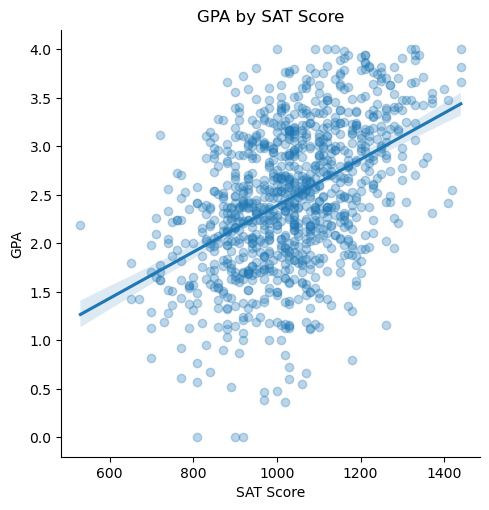

In [19]:
sns.lmplot(data=df, x='sat_sum', y='fy_gpa', scatter_kws={'alpha':0.3}).set(xlabel='SAT Score', ylabel='GPA', title='GPA by SAT Score')

In [5]:
pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LinearRegression())

In [6]:
X = df.drop('fy_gpa', axis='columns')
y = df['fy_gpa']

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
(800,)
(200,)


In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [43]:
y_pred = pipeline.predict(X_test)
model = sklearn.metrics.r2_score(y_test, y_pred)
print(model)

0.18531222693353944


## Interpertation

There does seem to be some coorelation between GPA and SAT scores, however with an R^2 of just under .2 the coorelation is rather weak and is therefore not reliable to use as a leading predictor.